# Data Visualization Tutorial
_________________________________________________________________________________

## Introduction

## Getting setup

!! Pre-requisite : You will need to download the train.csv file and save it in this directory either by running the following code block, or alternatively via Kaggle on the following link: https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/data. This is one of the most popular datasets used for understanding machine learning. It contains information relating to the passengers aboard the Titanic.

In [ ]:
!wget \
    -O train.csv \
    'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

Next, we will need to launch the server using Docker.

In [2]:
!docker run -it -p 50056:50056 -d mithrilsecuritysas/bastionlab:latest

Now we need to install the necessary dependecies for this notebook: bastionlab and polars.

In [3]:
! pip install polars
! pip install bastionlab

## Connection
In a typical workflow, the data owner would send a set of keys to the server so that authorization can be required for all users at the point of connection. However, for the sake of this demo, we will not make use of the authorization feature. We connect using the Connection() function and supplying the function with the host and port of our docker instance.

In [ ]:
from bastionlab import Connection

connection = Connection("localhost", 50056)
client = connection.client

In [5]:
import polars as pl
from bastionlab.polars.policy import Policy, TrueRule, Log

df = pl.read_csv("train.csv")
policy = Policy(safe_zone=TrueRule(), unsafe_handling=Log())
rdf = client.polars.send_df(df, policy=policy)

rdf

FetchableLazyFrame(identifier=7a207345-5f2f-4e5e-994f-6012663bb8a6)

Since we are using the classic Titanic dataset, let's list the columns to give you an idea of the data we will be handling in this tutorial.

In [6]:
rdf.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

## Histplot
_____________________________________________________________________

Now, let's take a look at the first of our data visualization options, **histplot**.

The histplot function accepts X and Y values, which are strings referring to a column name, plus a bins integer values, which is set to 10 by default. These argument are optional, but you must provide either an X or Y argument. We also accept any kwargs** arguments accepted by Seaborn's barplot function since we internally call this function once we have ran the releant aggregated query and applied bins to our dataframe. Accepted options are listed in the Seaborn documentation [here](https://seaborn.pydata.org/generated/seaborn.barplot.html).

Let's take a look at a simple example. Here, I create a histogram to show the number of passengers in each age category with bins of 15.

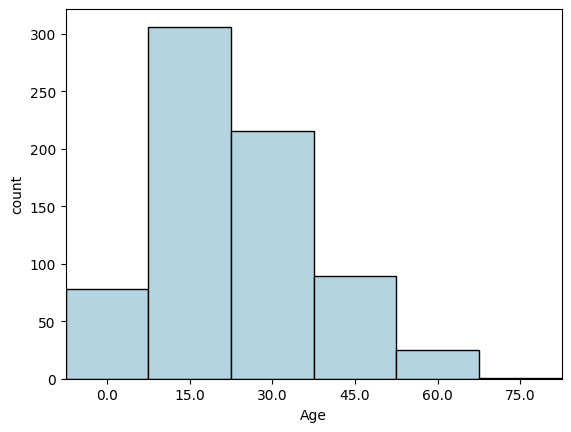

In [7]:
rdf.histplot(x="Age", bins=15)

If we provide an X and Y value, this will internally make use of Seaborn's heatmap function and thus accepts the options listen in Seaborn's heatmap documentation which you can view by clicking [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

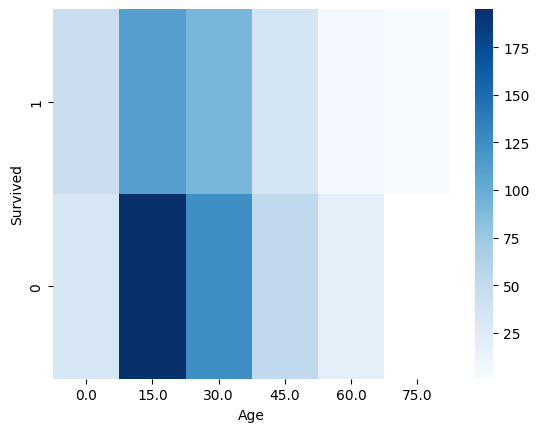

In [8]:
rdf.histplot(x="Age", y="Survived", bins=15)

## Scatterplot
________________________________________________________________________________

Bastionlab's scatterplot function will first narrow a dataset down to the necessary columns to make the function call and then will make use Seaborn's scatterplot function and so, again, will accept any options allowed by Seaborn's own function [here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

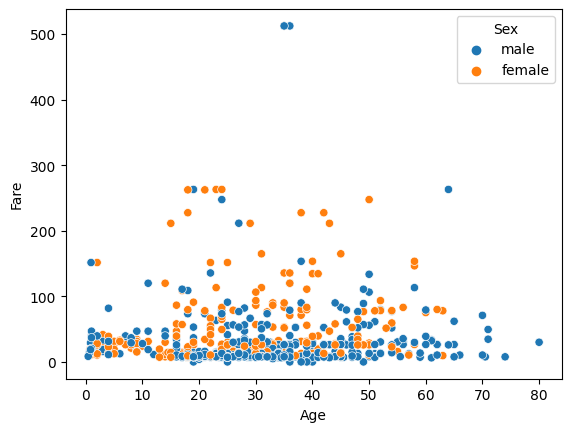

In [9]:
rdf.scatterplot("Age", "Fare", hue="Sex")

## Curveplot
________________________________________________________________________________

The curveplot works similarly to the scatterplot() function but makes uses of Seaborn's regplot function, which can be found [here](https://seaborn.pydata.org/generated/seaborn.regplot.html).

Default values of ci=None, scatter=False and order=3 values are applied, all of which can be modified when calling the curveplot function.


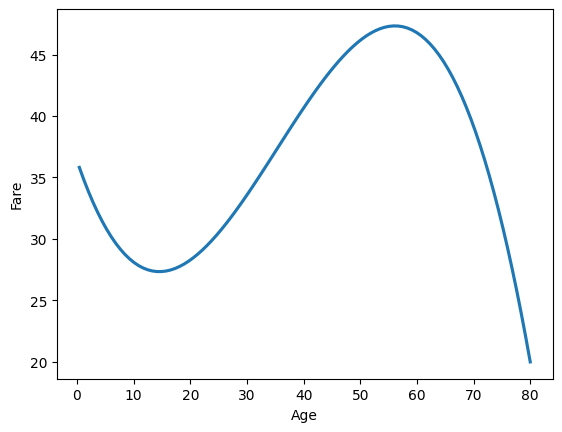

In [10]:
rdf.curveplot(x="Age", y="Fare")

## Facet grid with visualizations

The next thing you can do with BastionLab is create a Facet for your RemoteLazyFrame, which accepts a 'col' and 'row' argument. You can then call the three data visualization functions previously discussed through the lens of these columns and rows, that is to say, if you have a Facet with a 'row' value of class and you call my_facet.histplot(x="Age", bins=15), you will see three hsitplots, one showing the age of passengers in class 1, one for passengers in class 2 and the final one for class 3.

Before I continue any further, let's see the code for this example!

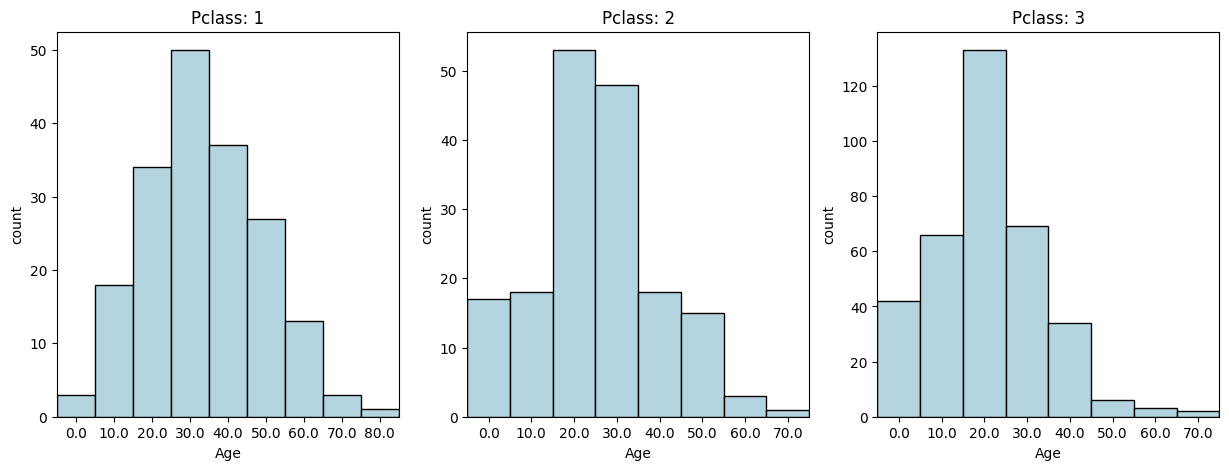

In [11]:
my_facet = rdf.facet(col="Pclass")
my_facet.histplot(x="Age")

So now we have seen an example with a row, let's add a column! I will also specify the figsize I want for my grid.

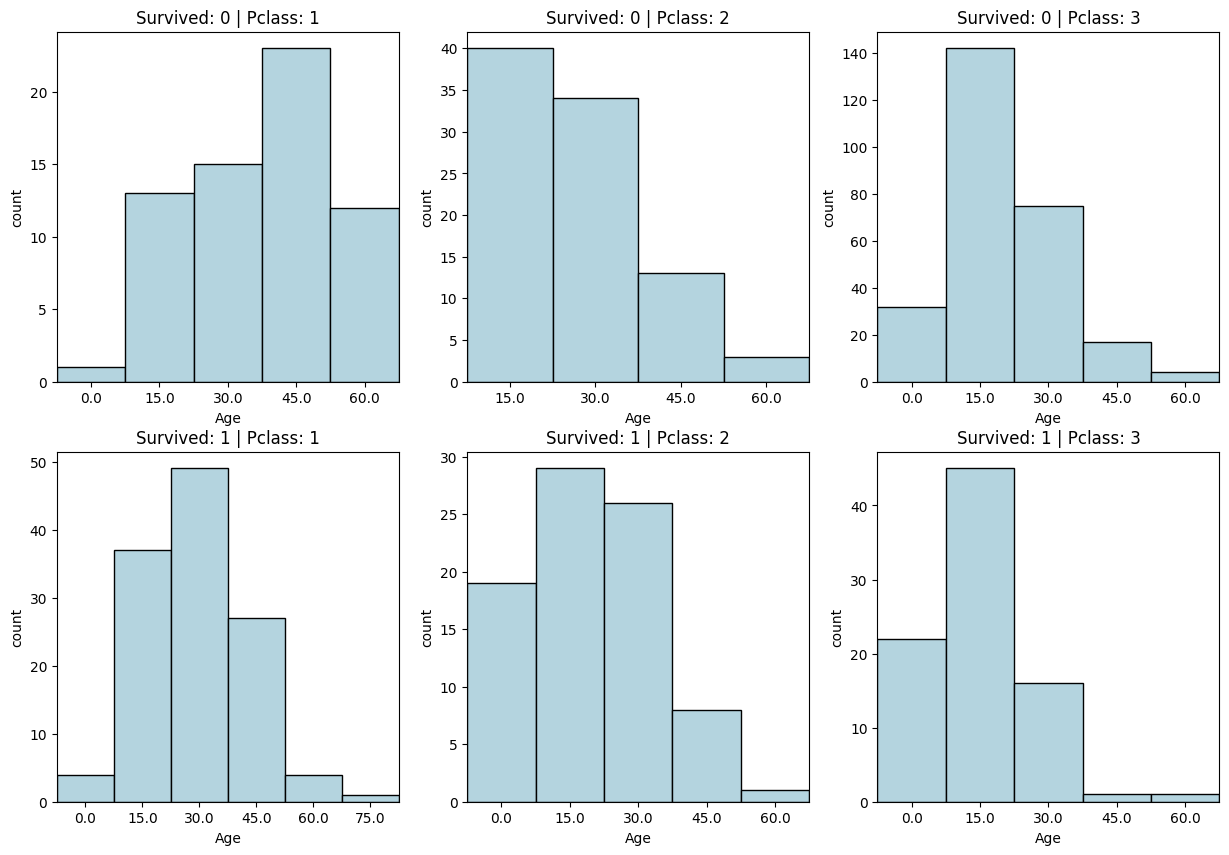

In [12]:
new_facet = rdf.facet(col="Pclass", row="Survived", figsize=(15, 10))
new_facet.histplot(x="Age", bins=15)

As you can see the grid now splits results into all the possible combinations of the column and row values.

As previously mentioned, this feature works with all the visualization functions!

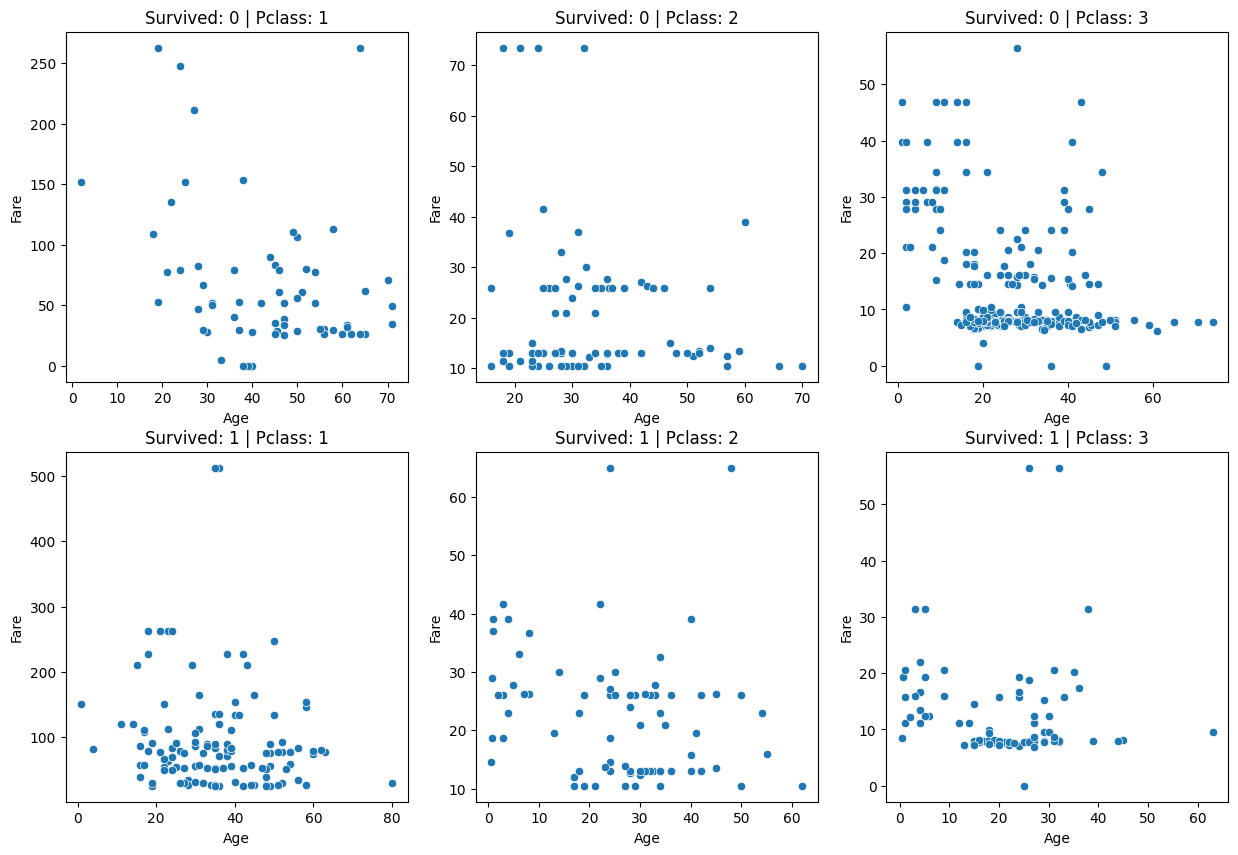

In [13]:
new_facet = rdf.facet(col="Pclass", row="Survived")
new_facet.scatterplot(x="Age", y="Fare")

Finally, we will close the conection to the server.

In [14]:
connection.close()